<a href="https://colab.research.google.com/github/abuzarbagewadi/AirQualityIndexVIz/blob/main/PokemonTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [6]:
df = pd.read_csv('/content/pokemon_alopez247.csv')

In [7]:
df.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [8]:
df = df[['isLegendary','Generation', 'Type_1', 'Type_2', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed','Color','Egg_Group_1','Height_m','Weight_kg','Body_Style']]

Converting column ('isLegendary') from True/False to 0/1

In [9]:
df['isLegendary'] = df['isLegendary'].astype(int)

Creating a dummy_creation function so that we can use it for multiple columns

In [10]:
def dummy_creation(df, dummy_categories):
    for i in dummy_categories:
        df_dummy = pd.get_dummies(df[i])
        df = pd.concat([df,df_dummy],axis=1)
        df = df.drop(i, axis=1)
    return(df)

In [11]:
df = dummy_creation(df, ['Egg_Group_1', 'Body_Style', 'Color','Type_1', 'Type_2'])

* Function to put Generation=1 data into test set
* Rest of it into training set

In [12]:
def train_test_splitter(DataFrame, column):
    df_train = DataFrame.loc[df[column] != 1]
    df_test = DataFrame.loc[df[column] == 1]

    df_train = df_train.drop(column, axis=1)
    df_test = df_test.drop(column, axis=1)

    return(df_train, df_test)

df_train, df_test = train_test_splitter(df, 'Generation')


Separating the labels (isLegendary category) from rest of the data    

In [13]:
def label_delineator(df_train, df_test, label):
    
    train_data = df_train.drop(label, axis=1).values
    train_labels = df_train[label].values
    test_data = df_test.drop(label,axis=1).values
    test_labels = df_test[label].values
    return(train_data, train_labels, test_data, test_labels)


In [14]:
train_data, train_labels, test_data, test_labels = label_delineator(df_train, df_test, 'isLegendary')

In [15]:
def data_normalizer(train_data, test_data):
    train_data = preprocessing.MinMaxScaler().fit_transform(train_data)
    test_data = preprocessing.MinMaxScaler().fit_transform(test_data)
    return(train_data, test_data)

train_data, test_data = data_normalizer(train_data, test_data)


In [16]:
length = train_data.shape[1]

model = keras.Sequential()
model.add(keras.layers.Dense(500, activation='relu', input_shape=[length,]))
model.add(keras.layers.Dense(2, activation='softmax'))

In [17]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
h = model.fit(train_data, train_labels, epochs=400)

Epoch 1/400
18/18 [==============================] - 0s 2ms/step - loss: 0.0809 - accuracy: 0.9912
Epoch 2/400
18/18 [==============================] - 0s 2ms/step - loss: 0.0799 - accuracy: 0.9912
Epoch 3/400
18/18 [==============================] - 0s 2ms/step - loss: 0.0790 - accuracy: 0.9912
Epoch 4/400
18/18 [==============================] - 0s 2ms/step - loss: 0.0781 - accuracy: 0.9912
Epoch 5/400
18/18 [==============================] - 0s 2ms/step - loss: 0.0772 - accuracy: 0.9912
Epoch 6/400
18/18 [==============================] - 0s 2ms/step - loss: 0.0763 - accuracy: 0.9912
Epoch 7/400
18/18 [==============================] - 0s 2ms/step - loss: 0.0755 - accuracy: 0.9912
Epoch 8/400
18/18 [==============================] - 0s 2ms/step - loss: 0.0747 - accuracy: 0.9895
Epoch 9/400
18/18 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9912
Epoch 10/400
18/18 [==============================] - 0s 2ms/step - loss: 0.0731 - accuracy: 0.9895
Epoch 11/

In [53]:
loss_value, accuracy_value = model.evaluate(test_data, test_labels)
print('Our test accuracy was' ,accuracy_value)

5/5 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9801
Our test accuracy was 0.9801324605941772


Function to identify a specific image of Pokemon

In [54]:
def predictor(test_data, test_labels, index):
    prediction = model.predict(test_data)
    if np.argmax(prediction[index]) == test_labels[index]:
        print(f'This was correctly predicted to be a \"{test_labels[index]}\"!')
    else:
        print(f'This was incorrectly predicted to be a \"{np.argmax(prediction[index])}\". It was actually a \"{test_labels[index]}\".')
        return(prediction)

In [55]:
predictor(test_data, test_labels, 2)

This was correctly predicted to be a "0"!


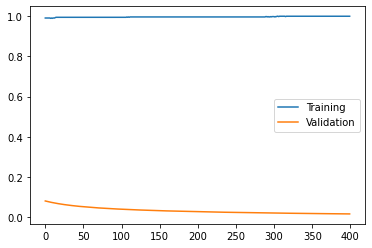

In [56]:
accs = h.history['accuracy']
val_accs = h.history['loss']

plt.plot(range(len(accs)), accs, label='Training')
plt.plot(range(len(accs)), val_accs, label='Validation')
plt.legend()
plt.show()